In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../datasets/train.csv')
df

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.300
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.700
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.000
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.900
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
629995,629995,18,female,b.tech,4.86,70.7,yes,4.1,good,mixed,high,moderate,69.500
629996,629996,21,female,ba,7.08,54.4,yes,4.5,average,mixed,low,moderate,78.900
629997,629997,24,male,bca,0.64,44.2,yes,4.3,poor,online videos,low,moderate,19.599
629998,629998,20,male,b.com,1.54,75.1,yes,8.2,average,group study,high,moderate,59.100


(array([121077.,      0., 131131.,      0.,      0., 131697.,      0.,
        123009.,      0., 123086.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

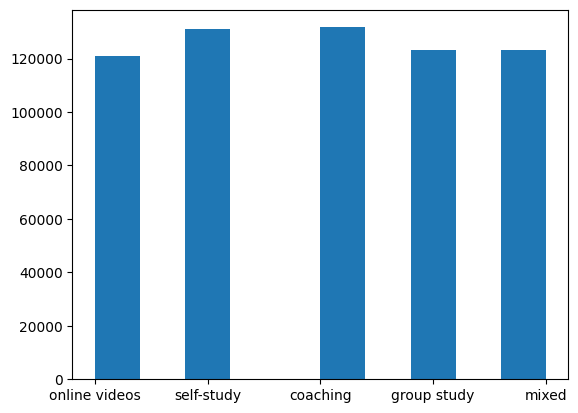

In [23]:
plt.hist(df['study_method'])

In [8]:
categories, counts = np.unique(df['exam_difficulty'], return_counts=True)
print(categories,counts)

['easy' 'hard' 'moderate'] [176540  99478 353982]


In [18]:
categories, counts = np.unique(df['internet_access'], return_counts=True)
print(categories,counts)

['no' 'yes'] [ 50577 579423]


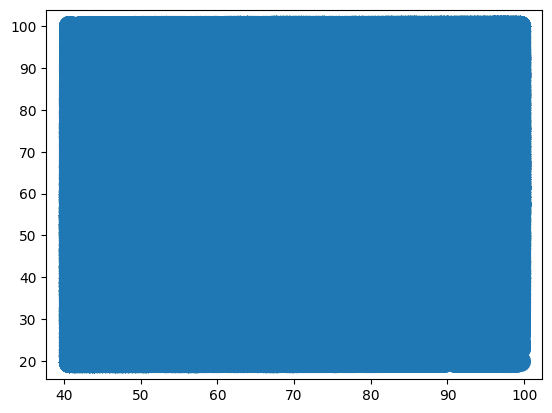

In [46]:
plt.scatter(df['class_attendance'],df['exam_score'],s=200)

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,5:6],df.iloc[:,-1],test_size=0.2,random_state=2)

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [43]:
x_train
# y_train

,class_attendance
116777,99.4
537751,59.2
378321,99.4
478825,80.2
576424,93.3
...,...
84434,65.9
437782,95.4
620104,80.3
203245,89.9


In [44]:
lr.fit(x_train,y_train)

LinearRegression()

In [45]:
from sklearn.metrics import r2_score
y_pred = lr.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.1297957315583046


In [9]:
df1 = df.head()
df1

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


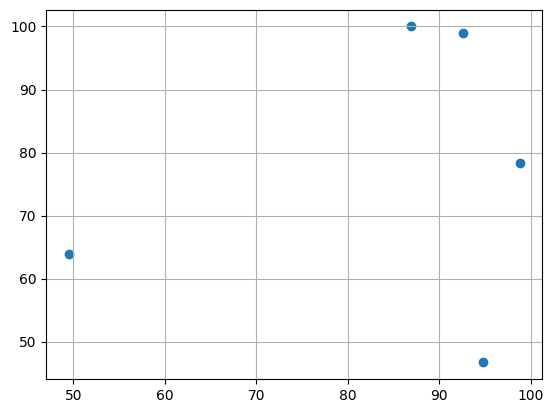

In [13]:
plt.grid(True)
plt.scatter(df1['class_attendance'],df1['exam_score'])